In [ ]:
# # setup for the colab
# !pip install imageio
# !pip install torch
# !pip install kaggle
# # upload kaggle.json for data downloading
# from google.colab import files
# files.upload()
# !mkdir -p ~/.kaggle
# !mv kaggle.json ~/.kaggle
# !chmod 600 ~/.kaggle/kaggle.json
# !kaggle competitions download -c tgs-salt-identification-challenge
# !mkdir -p test
# !mkdir -p train
# !unzip test.zip -d test
# !unzip train.zip -d train

In [ ]:
import os
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import imageio
from torch.utils import data

In [ ]:
HEIGHT, WIDTH = 101, 101

In [ ]:
class TrainDataset(data.Dataset):
    def __init__(self, file_list, root_path):
        self.file_list = file_list
        self.root_path = root_path
        
    def __len__(self):
        return len(self.file_list)
    
    def __getitem__(self, index):
        file_id = self.file_list[index]
        train_path = os.path.join(self.root_path, "train")
        image_path = os.path.join(train_path, "images", file_id + '.png')
        image = np.array(imageio.imread(image_path), dtype=np.uint8)
        
        mask_path = os.path.join(train_path, "masks", file_id + '.png')
        mask = np.array(imageio.imread(mask_path), dtype=np.uint8)
        return image, mask

In [ ]:
train_masks = pd.read_csv('train.csv')
file_list = list(train_masks['id'])
# read the list of files and print them with map
# compare train mask with mask images from set

dataset = TrainDataset(file_list, './')

In [110]:
def rle_to_mask(rle_string):
    if isinstance(rle_string, float) and np.isnan(rle_string):
        return np.zeros((HEIGHT, WIDTH)) 
    rle_numbers = [int(num) for num in rle_string.split()] 
    rle_pairs = np.array(rle_numbers).reshape((-1, 2))
    
    mask = np.zeros(HEIGHT*WIDTH)
    for start, length in rle_pairs:
        mask[start+1: start+1+length] = 255
    
    mask = mask.reshape((HEIGHT, WIDTH))
        
    return mask


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]]
[[  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]]
[[255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 ...
 [255 255 255 

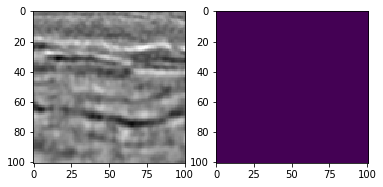

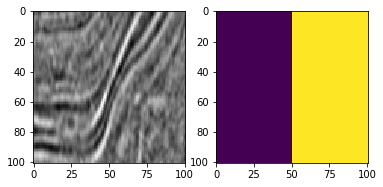

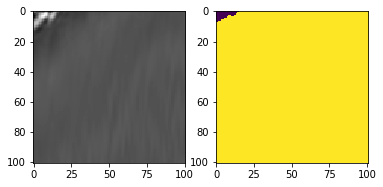

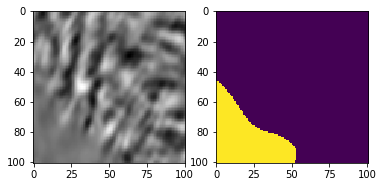

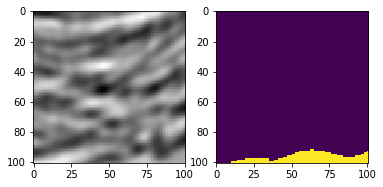

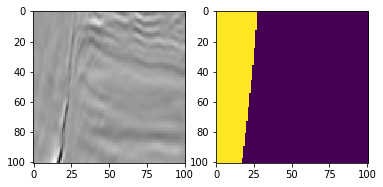

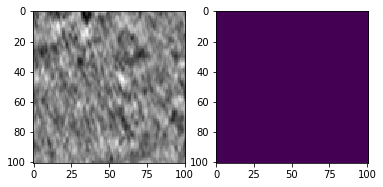

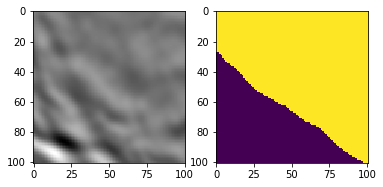

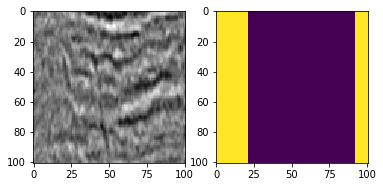

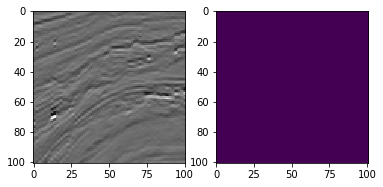

In [76]:
for i in range(10):
#     image, mask = dataset[random.randint(0, len(dataset)-1)]
    image, mask = dataset[i]
    f, axarr = plt.subplots(1, 2)
    axarr[0].imshow(image)
    axarr[1].imshow(mask, cmap=)
    axarr[2].imshow(rle_to_mask(train_masks['rle_mask'][2]))
    